<a href="https://colab.research.google.com/github/martin-fabbri/colab-notebooks/blob/master/nlp/bert/fastai_hugginface_transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fastai 2 HuggingFace Transormers

In [1]:
! [ -e /content ] && pip install -Uqq fastai
!pip install -Uqq transformers

     |████████████████████████████████| 194kB 5.7MB/s 
     |████████████████████████████████| 61kB 9.4MB/s 
     |████████████████████████████████| 1.4MB 5.8MB/s 
     |████████████████████████████████| 2.9MB 51.6MB/s 
     |████████████████████████████████| 890kB 37.4MB/s 


GPT2LMHeadModel -> Language Model

In [2]:
!nvidia-smi -L

GPU 0: Tesla V100-SXM2-16GB (UUID: GPU-7e835d47-559e-0d40-9d9f-c77b6ccc0f11)


In [3]:
#!cat /proc/cpuinfo

In [4]:
import torch
from transformers import GPT2LMHeadModel
from transformers import GPT2TokenizerFast
from fastai.text.all import *
from psutil import virtual_memory

In [5]:
ram_gb = virtual_memory().total / 1e9
print(f'Runtime has {ram_gb:.1f} gigabytes of available RAM')

Runtime has 13.7 gigabytes of available RAM


In [6]:
pretrained_weights = 'gpt2'
tokenizer = GPT2TokenizerFast.from_pretrained(pretrained_weights)
model = GPT2LMHeadModel.from_pretrained(pretrained_weights)

In [7]:
ram_gb = virtual_memory().total / 1e9
print(f'Runtime has {ram_gb:.1f} gigabytes of available RAM')

Runtime has 13.7 gigabytes of available RAM


In [8]:
ids = tokenizer.encode('Just another test text testing huggingfaces')
ids

[5703, 1194, 1332, 2420, 4856, 46292, 32186]

In [9]:
tokenizer.decode(ids)

'Just another test text testing huggingfaces'

In [10]:
t = torch.LongTensor(ids)[None]
preds = model.generate(t)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [11]:
preds.shape, preds[0]

(torch.Size([1, 20]),
 tensor([ 5703,  1194,  1332,  2420,  4856, 46292, 32186,    13,   198,   198,
            40,  1101,   407,  1654,   611,   428,   318,   257,   922,  2126]))

In [12]:
tokenizer.decode(preds[0].numpy())

"Just another test text testing huggingfaces.\n\nI'm not sure if this is a good idea"

In [13]:
ids2 = tokenizer.encode('Deep Learning rules!')
t2 = torch.LongTensor(ids2)[None]
preds2 = model.generate(t2)
tokenizer.decode(preds2[0].numpy())

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'Deep Learning rules!\n\nThe first step is to create a new class called "Learning Objectives'

In [14]:
ids3 = tokenizer.encode('Machine Learning is everywhere.')
t3 = torch.LongTensor(ids3)[None]
preds3 = model.generate(t3)
tokenizer.decode(preds3[0].numpy())

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'Machine Learning is everywhere.\n\nThe first thing you need to do is to create a new class'

In [15]:
path = untar_data(URLs.WIKITEXT_TINY)
path.ls()

(#2) [Path('/root/.fastai/data/wikitext-2/train.csv'),Path('/root/.fastai/data/wikitext-2/test.csv')]

In [16]:
df_train = pd.read_csv(path/'train.csv', header=None)
df_valid = pd.read_csv(path/'test.csv', header=None)
print('df_train.shape ->', df_train.shape)
df_train.head()

df_train.shape -> (615, 1)


,0
0,"\n = 2013 – 14 York City F.C. season = \n \n The 2013 – 14 season was the <unk> season of competitive association football and 77th season in the Football League played by York City Football Club , a professional football club based in York , North Yorkshire , England . Their 17th @-@ place finish in 2012 – 13 meant it was their second consecutive season in League Two . The season ran from 1 July 2013 to 30 June 2014 . \n Nigel Worthington , starting his first full season as York manager , made eight permanent summer signings . By the turn of the year York were only above the relegation z..."
1,"\n = Big Boy ( song ) = \n \n "" Big Boy "" <unk> "" I 'm A Big Boy Now "" was the first single ever recorded by the Jackson 5 , which was released by Steeltown Records in January 1968 . The group played instruments on many of their Steeltown compositions , including "" Big Boy "" . The song was neither a critical nor commercial success , but the Jackson family were delighted with the outcome nonetheless . \n The Jackson 5 would release a second single with Steeltown Records before moving to Motown Records . The group 's recordings at Steeltown Records were thought to be lost , but they were re..."
2,"\n = The Remix ( Lady Gaga album ) = \n \n The Remix is a remix album by American recording artist Lady Gaga . Released in Japan on March 3 , 2010 , it contains remixes of the songs from her first studio album , The Fame ( 2008 ) , and her third extended play , The Fame Monster ( 2009 ) . A revised version of the track list was prepared for release in additional markets , beginning with Mexico on May 3 , 2010 . A number of recording artists have produced the songs , including Pet Shop Boys , Passion Pit and The Sound of Arrows . The remixed versions feature both uptempo and <unk> composit..."
3,"\n = New Year 's Eve ( Up All Night ) = \n \n "" New Year 's Eve "" is the twelfth episode of the first season of the American comedy television series Up All Night . The episode originally aired on NBC in the United States on January 12 , 2012 . It was written by Erica <unk> and was directed by Beth McCarthy @-@ Miller . The episode also featured a guest appearance from Jason Lee as Chris and Reagan 's neighbor and Ava 's boyfriend , Kevin . \n During Reagan ( Christina Applegate ) and Chris 's ( Will <unk> ) first New Year 's Eve game night , Reagan 's competitiveness comes out causing Ch..."
4,"\n = Geopyxis carbonaria = \n \n Geopyxis carbonaria is a species of fungus in the genus Geopyxis , family <unk> . First described to science in 1805 , and given its current name in 1889 , the species is commonly known as the charcoal loving elf @-@ cup , dwarf <unk> cup , <unk> <unk> cup , or pixie cup . The small , <unk> @-@ shaped fruitbodies of the fungus are reddish @-@ brown with a whitish fringe and measure up to 2 cm ( 0 @.@ 8 in ) across . They have a short , tapered stalk . Fruitbodies are commonly found on soil where brush has recently been burned , sometimes in great numbers ...."


In [17]:
all_texts = np.concatenate([df_train[0].values, df_valid[0].values])

In a fastai `Transform` you can define:
- an <code>encodes</code> method that is applied when you call the transform (a bit like the `forward` method in a `nn.Module`)
- a <code>decodes</code> method that is applied when you call the `decode` method of the transform, if you need to decode anything for showing purposes (like converting ids to a text here)
- a <code>setups</code> method that sets some inner state of the `Transform` (not needed here so we skip it)

In [18]:
class TransformersTokenizer(Transform):
  def __init__(self, tokenizer): 
    self.tokenizer = tokenizer
  
  def encodes(self, x):
    toks = self.tokenizer.tokenize(x)
    toks = self.tokenizer.tokenize(x)
    return tensor(self.tokenizer.convert_tokens_to_ids(toks))
    return tensor(self.tokenizer.convert_tokens_to_ids(toks))

  def decodes(self, x):
    return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

In [19]:
tok = tokenizer.tokenize('Just some simple text.')
tok

['Just', 'Ġsome', 'Ġsimple', 'Ġtext', '.']

In [20]:
tokenizer.convert_tokens_to_ids(tok)

[5703, 617, 2829, 2420, 13]

In [21]:
tokenizer.encode('Just some simple text.')

[5703, 617, 2829, 2420, 13]

Two comments on the code above:
- in <code>encodes</code> we don't use the `tokenizer.encode` method since it does some additional preprocessing for the model after tokenizing and numericalizing (the part throwing a warning before). Here we don't need any post-processing so it's fine to skip it.
- in <code>decodes</code> we return a `TitledStr` object and not just a plain string. That's a fastai class that adds a `show` method to the string, which will allow us to use all the fastai show methods.

You can then group your data with this `Transform` using a `TfmdLists`. It has an s in its name because it contains the training and validation set. We indicate the indices of the training set and the validation set with `splits` (here all the first indices until `len(df_train)` and then all the remaining indices):

In [22]:
splits = [range_of(df_train), list(range(len(df_train), len(all_texts)))]
tls = TfmdLists(
    all_texts, 
    TransformersTokenizer(tokenizer), # endode/decode -> GPT2TokenizerFast 
    splits=splits, 
    dl_type=LMDataLoader # Language Model DataLoader???
)

In [23]:
len(range_of(df_train)), range_of(df_train)[:5]

(615, [0, 1, 2, 3, 4])

In [24]:
len(all_texts)

662

We specify `dl_type=LMDataLoader` for when we will convert this `TfmdLists` to `DataLoaders`: we will use an `LMDataLoader` since we have a language modeling problem, not the usual fastai `TfmdDL`.

In a `TfmdLists` you can access the elements of the training or validation set quite easily:

In [25]:
tls.train[0], tls.valid[0]

(tensor([220, 198, 796,  ..., 198, 220, 198]),
 tensor([220, 198, 796,  ..., 198, 220, 198]))

In [26]:
tls.tfms(tls.train.items[0]).shape, tls.tfms(tls.valid.items[0]).shape

(torch.Size([4576]), torch.Size([1485]))

In [27]:
show_at(tls.train, 0)

 
 = 2013 – 14 York City F.C. season = 
 
 The 2013 – 14 season was the <unk> season of competitive association football and 77th season in the Football League played by York City Football Club, a professional football club based in York, North Yorkshire, England. Their 17th @-@ place finish in 2012 – 13 meant it was their second consecutive season in League Two. The season ran from 1 July 2013 to 30 June 2014. 
 Nigel Worthington, starting his first full season as York manager, made eight permanent summer signings. By the turn of the year York were only above the relegation zone on goal difference, before a 17 @-@ match unbeaten run saw the team finish in seventh @-@ place in the 24 @-@ team 2013 – 14 Football League Two. This meant York qualified for the play @-@ offs, and they were eliminated in the semi @-@ final by Fleetwood Town. York were knocked out of the 2013 – 14 FA Cup, Football League Cup and Football League Trophy in their opening round matches. 
 35 players made at least

In [28]:
show_at(tls.valid, 0)

 
 = Tropical Storm <unk> ( 2008 ) = 
 
 Tropical Storm <unk> was the tenth tropical storm of the 2008 Atlantic hurricane season. <unk> developed out of a strong tropical wave which moved off the African coast on August 31. The wave quickly became organized and was declared Tropical Depression Ten while located 170 mi ( 270 km ) to the south @-@ southeast of the Cape Verde Islands on September 2. The depression was quickly upgraded to Tropical Storm <unk> around noon the same day. Over the next several days, <unk> moved in a general west @-@ northwest direction and reached its peak intensity early on September 3. Strong wind shear, some due to the outflow of Hurricane Ike, and dry air caused the storm to weaken. On September 6, the combination of wind shear, dry air, and cooling waters caused <unk> to weaken into a tropical depression. <unk> deteriorated into a remnant low shortly after as convection continued to dissipate around the storm. The low ultimately dissipated while located 5

The fastai library expects the data to be assembled in a `DataLoaders` object (something that has a training and validation dataloader). We can get one by using the `dataloaders` method. We just have to specify a batch size and a sequence length. Since the GPT2 model was trained with sequences of size 1024, we use this sequence length (it's a stateless model, so it will change the perplexity if we use less):

In [29]:
bs, sl = 8, 1024
dls = tls.dataloaders(bs=bs, seq_len=sl)

In fastai, as soon as we have a `DataLoaders`, we can use `show_batch` to have a look at the data (here texts for inputs, and the same text shifted by one token to the right for validation):

In [30]:
dls.show_batch(max_n=2)

,text,text_
0,"Key : Pld \n = Played, W = \n \n = Halo : Uprising = \n \n Halo : Uprising is a four @-@ issue American comic book limited series set in the Halo universe. The series was written by Brian Michael Bendis, illustrated by Alex Maleev, and published by Marvel Comics. Uprising tells a story set between the ending of the 2004 video game Halo 2 and the beginning of its sequel, Halo 3, as Earth is under attack by a collective of alien races known as the Covenant. The series was intended to be released and concluded before Halo 3 shipped on September 25, 2007, but the final issue did not appear until April 2009. \n The series was brought together by Ruwan Jayatilleke, Marvel's Vice President of Development. He attained the license to publish Halo comics, including the single @-@ volume The Halo Graphic Novel, in",": Pld \n = Played, W = \n \n = Halo : Uprising = \n \n Halo : Uprising is a four @-@ issue American comic book limited series set in the Halo universe. The series was written by Brian Michael Bendis, illustrated by Alex Maleev, and published by Marvel Comics. Uprising tells a story set between the ending of the 2004 video game Halo 2 and the beginning of its sequel, Halo 3, as Earth is under attack by a collective of alien races known as the Covenant. The series was intended to be released and concluded before Halo 3 shipped on September 25, 2007, but the final issue did not appear until April 2009. \n The series was brought together by Ruwan Jayatilleke, Marvel's Vice President of Development. He attained the license to publish Halo comics, including the single @-@ volume The Halo Graphic Novel, in 2005."
1,"् <unk>, literally "" beautiful marriage "" ), also spelt as <unk> and <unk> <unk>, and known as Kalyanasundara @-@ murti ( "" icon of the beautiful marriage "" ), <unk> @-@ murti ( <unk> @-@ <unk> ् <unk>, "" <unk> icon "" ) and <unk> @-@ murti ( <unk> ् <unk> @-@ <unk> ् <unk> ) ( "" icon related to panigrahana ritual "" ), is the <unk> depiction of the wedding of the Hindu deities Shiva and Parvati. The couple are often depicted performing the panigrahana ( "" accepting the hand "" ) ritual of a Hindu wedding, where the groom accepts the bride by taking her right hand in his. \n The couple, depicted in the centre, are accompanied by a host of divinities and other celestial beings. The god Vishnu and his wife Lakshmi are often pictured as giving away the bride to Shiva. The god","� <unk>, literally "" beautiful marriage "" ), also spelt as <unk> and <unk> <unk>, and known as Kalyanasundara @-@ murti ( "" icon of the beautiful marriage "" ), <unk> @-@ murti ( <unk> @-@ <unk> ् <unk>, "" <unk> icon "" ) and <unk> @-@ murti ( <unk> ् <unk> @-@ <unk> ् <unk> ) ( "" icon related to panigrahana ritual "" ), is the <unk> depiction of the wedding of the Hindu deities Shiva and Parvati. The couple are often depicted performing the panigrahana ( "" accepting the hand "" ) ritual of a Hindu wedding, where the groom accepts the bride by taking her right hand in his. \n The couple, depicted in the centre, are accompanied by a host of divinities and other celestial beings. The god Vishnu and his wife Lakshmi are often pictured as giving away the bride to Shiva. The god"


In [31]:
def tokenize(text):
  toks = tokenizer.tokenize(text)
  return tensor(tokenizer.convert_tokens_to_ids(toks))

tokenized = [tokenize(t) for t in progress_bar(all_texts)]

Now we change the previous `Tokenizer` like this:

In [32]:
class TransformersTokenizer(Transform):
  def __init__(self, tokenizer):
    self.tokenizer = tokenizer

  def encodes(self, x):
    return x if isinstance(x, Tensor) else tokenize(x)

  def decodes(self, x): 
    return TitledStr(self.tokenizer.decode(x.cpu().numpy())) 

In [33]:
tls = TfmdLists(
    tokenized, 
    TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader
)
dls = tls.dataloaders(bs=bs, seq_len=sl)

In [34]:
dls.show_batch(max_n=2)

,text,text_
0,"\n = Midge ( Barbie ) = \n \n Midge <unk> is a fictional doll character in the Barbie line of toys by Mattel that was first released in 1963. Midge was created, along with <unk>, to counteract criticism that claimed Barbie was a sex symbol. She was marketed as Barbie's best friend. No Midge dolls were sold for the rest of the vintage years after the 1960s. \n Midge was re @-@ introduced in 1988 as part of the play line, though two vintage reproduction dolls were made specifically for collectors in 1993 and 1998. The dolls sold in this time period usually had red hair, often with freckles, and her eye color was usually blue. Also in the period, Wedding Day Midge was sold, with the groom being Alan Sherwood, who had been marketed as Midge's boyfriend in the vintage years. Midge and Alan had three children","\n = Midge ( Barbie ) = \n \n Midge <unk> is a fictional doll character in the Barbie line of toys by Mattel that was first released in 1963. Midge was created, along with <unk>, to counteract criticism that claimed Barbie was a sex symbol. She was marketed as Barbie's best friend. No Midge dolls were sold for the rest of the vintage years after the 1960s. \n Midge was re @-@ introduced in 1988 as part of the play line, though two vintage reproduction dolls were made specifically for collectors in 1993 and 1998. The dolls sold in this time period usually had red hair, often with freckles, and her eye color was usually blue. Also in the period, Wedding Day Midge was sold, with the groom being Alan Sherwood, who had been marketed as Midge's boyfriend in the vintage years. Midge and Alan had three children introduced"
1,"s acted independently of Millennium Park officials ; they conducted independent surveys of water technologies, held their own informal design contest, and stayed active in the design and engineering of the project. \n The Crowns were open @-@ minded about the choice of artist ; wanting a modern work, they solicited proposals from a list of prospective artists and architects. <unk> Plensa researched the traditions and history of fountains and studied <unk> in fountain imagery. Some of his early ideas for the project referenced Buckingham Fountain, but these were soon abandoned. His presentation to the Crown family started with a slide show of fountains from the Middle Ages through the 20th century. Plensa focused on the philosophical meanings associated with fountains, their history, use and art. His presentation included computer animation of facial expressions. The other finalists were Maya Lin, who presented a low @-@ height horizontal form, and Robert","acted independently of Millennium Park officials ; they conducted independent surveys of water technologies, held their own informal design contest, and stayed active in the design and engineering of the project. \n The Crowns were open @-@ minded about the choice of artist ; wanting a modern work, they solicited proposals from a list of prospective artists and architects. <unk> Plensa researched the traditions and history of fountains and studied <unk> in fountain imagery. Some of his early ideas for the project referenced Buckingham Fountain, but these were soon abandoned. His presentation to the Crown family started with a slide show of fountains from the Middle Ages through the 20th century. Plensa focused on the philosophical meanings associated with fountains, their history, use and art. His presentation included computer animation of facial expressions. The other finalists were Maya Lin, who presented a low @-@ height horizontal form, and Robert"


### Fine-tuning the model

The HuggingFace model will return a tuple in outputs, with the actual predictions and some additional activations (should we want to use them in some regularization scheme). To work inside the fastai training loop, we will need to drop those using a `Callback`: we use those to alter the behavior of the training loop.

Here we need to write the event `after_pred` and replace `self.learn.pred` (which contains the predictions that will be passed to the loss function) by just its first element. In callbacks, there is a shortcut that lets you access any of the underlying `Learner` attributes so we can write `self.pred[0]` instead of `self.learn.pred[0]`. That shortcut only works for read access, not write, so we have to write `self.learn.pred` on the right side (otherwise we would set a `pred` attribute in the `Callback`).

In [35]:
class DropOutput(Callback):
  def after_pred(self):
    self.learn.pred = self.pred[0]

Of course we could make this a bit more complex and add some penalty to the loss using the other part of the tuple of predictions, like the `RNNRegularizer`.

Now, we are ready to create our `Learner`, which is a fastai object grouping data, model and loss function and handles model training or inference. Since we are in a language model setting, we pass perplexity as a metric, and we need to use the callback we just defined. Lastly, we use mixed precision to save every bit of memory we can (and if you have a modern GPU, it will also make training faster):

In [36]:
learn = Learner(
    dls,
    model,
    loss_func=CrossEntropyLossFlat(),
    cbs=[DropOutput],
    metrics=Perplexity()
).to_fp16()

We can check how good the model is without any fine-tuning step (spoiler alert, it's pretty good!)

In [37]:
learn.validate()

(#2) [3.253685712814331,25.885570526123047]

This lists the validation loss and metrics (so 26.6 as perplexity is kind of amazing).

Now that we have a `Learner` we can use all the fastai training loop capabilities: learning rate finder, training with 1cycle etc... 

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.0831763744354248)

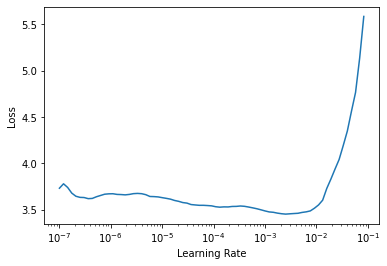

In [38]:
learn.lr_find()

The learning rate finder curve suggests picking something between 1e-4 and 1e-2.

In [39]:
learn.fit_one_cycle(1, 1e-4)

epoch,train_loss,valid_loss,perplexity,time
0,3.647719,3.227445,25.215141,02:40


Now with just one epoch of fine-tuning and not much regularization, our model did not really improve since it was already amazing. To have a look at some generated texts, let's take a prompt that looks like a wikipedia article:

In [40]:
df_valid.head(1)

,0
0,"\n = Tropical Storm <unk> ( 2008 ) = \n \n Tropical Storm <unk> was the tenth tropical storm of the 2008 Atlantic hurricane season . <unk> developed out of a strong tropical wave which moved off the African coast on August 31 . The wave quickly became organized and was declared Tropical Depression Ten while located 170 mi ( 270 km ) to the south @-@ southeast of the Cape Verde Islands on September 2 . The depression was quickly upgraded to Tropical Storm <unk> around noon the same day . Over the next several days , <unk> moved in a general west @-@ northwest direction and reached its peak..."


Article seems to begin with new line and the title between = signs, so we will mimic that:

In [42]:
prompt = "\n = Unicorn = \n \n A unicorn is a magical creature with a rainbow tail and a horn"

The prompt needs to be tokenized and numericalized, so we use the same function as before to do this, before we use the `generate` method of the model.

In [44]:
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
inp.shape

torch.Size([1, 21])

In [47]:
preds = learn.model.generate(inp, max_length=40, num_beams=5, temperature=1.5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [48]:
tokenizer.decode(preds[0].cpu().numpy())

'\n = Unicorn = \n \n A unicorn is a magical creature with a rainbow tail and a horn on its head.\n\nA unicorn is a magical creature with a rainbow tail and a horn'